In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer  
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
plt.style.use('seaborn-poster')
%matplotlib inline
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 250
n_classes =  ["Oph","Uro","D","Ortho","GYN","P","S","G&H"]

Load Data

In [2]:
train_texts = open('data/train_contents.txt').read().split('\n')
train_labels = open('data/train_labels.txt').read().split('\n')
test_texts = open('data/test_contents.txt').read().split('\n')
test_labels = open('data/test_labels.txt').read().split('\n')
all_text = train_texts + test_texts

In [3]:
count_v0= CountVectorizer();  
counts_all = count_v0.fit_transform(all_text);
count_v1= CountVectorizer(vocabulary=count_v0.vocabulary_);  
counts_train = count_v1.fit_transform(train_texts);   
print ("the shape of train is "+repr(counts_train.shape))
count_v2 = CountVectorizer(vocabulary=count_v0.vocabulary_);  
counts_test = count_v2.fit_transform(test_texts);  
print ("the shape of test is "+repr(counts_test.shape))
tfidftransformer = TfidfTransformer();    
train_data = tfidftransformer.fit(counts_train).transform(counts_train);
test_data = tfidftransformer.fit(counts_test).transform(counts_test); 


the shape of train is (23192, 48486)
the shape of test is (808, 48486)


data to vector

In [4]:
x_train = train_data
y_train = train_labels
x_test = test_data
y_test = test_labels

plot 

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(10, 8)) 
    plt.rcParams['font.size'] = 15
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Naive Bayes

accuracy:0.8960396039603961
[[99  0  0  0  2  0  0  0]
 [ 0 99  0  0  1  0  0  1]
 [ 0  2 98  0  1  0  0  0]
 [ 0  5  0 96  0  0  0  0]
 [ 0  5  0  0 94  0  2  0]
 [ 0  1  0  0  2 98  0  0]
 [ 0 10  0  1  4  1 82  3]
 [ 0 24  0  0 11  1  7 58]]
              precision    recall  f1-score   support

           1     1.0000    0.9802    0.9900       101
           2     0.6781    0.9802    0.8016       101
           3     1.0000    0.9703    0.9849       101
           4     0.9897    0.9505    0.9697       101
           5     0.8174    0.9307    0.8704       101
           6     0.9800    0.9703    0.9751       101
           7     0.9011    0.8119    0.8542       101
           8     0.9355    0.5743    0.7117       101

   micro avg     0.8960    0.8960    0.8960       808
   macro avg     0.9127    0.8960    0.8947       808
weighted avg     0.9127    0.8960    0.8947       808



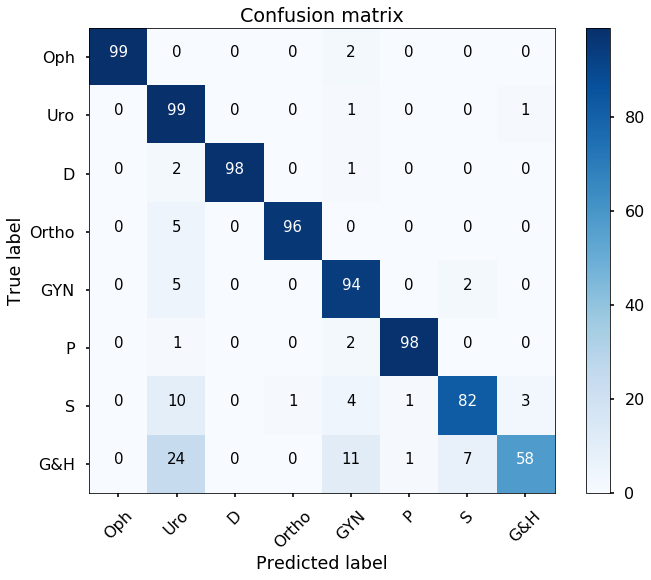

In [7]:
from sklearn.naive_bayes import MultinomialNB  
clf = MultinomialNB(alpha = 0.01)   
clf.fit(x_train, y_train);  
preds = clf.predict(x_test);

print("accuracy:"+ str(accuracy_score(y_test, preds)))
print(metrics.confusion_matrix(y_test, preds))
print(classification_report(y_pred=preds, y_true=y_test, digits=4))
cm = metrics.confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, n_classes, title='Confusion matrix')

KNN

accuracy:0.6571782178217822
[[83 14  0  0  2  1  1  0]
 [ 0 96  0  0  4  0  1  0]
 [ 0 20 78  0  2  0  1  0]
 [ 0 30  0 62  8  0  1  0]
 [ 0 19  0  0 78  0  3  1]
 [ 1 29  2  2 12 54  0  1]
 [ 1 35  0  3 11  2 41  8]
 [ 0 47  0  0  9  0  6 39]]
              precision    recall  f1-score   support

           1     0.9765    0.8218    0.8925       101
           2     0.3310    0.9505    0.4910       101
           3     0.9750    0.7723    0.8619       101
           4     0.9254    0.6139    0.7381       101
           5     0.6190    0.7723    0.6872       101
           6     0.9474    0.5347    0.6835       101
           7     0.7593    0.4059    0.5290       101
           8     0.7959    0.3861    0.5200       101

   micro avg     0.6572    0.6572    0.6572       808
   macro avg     0.7912    0.6572    0.6754       808
weighted avg     0.7912    0.6572    0.6754       808



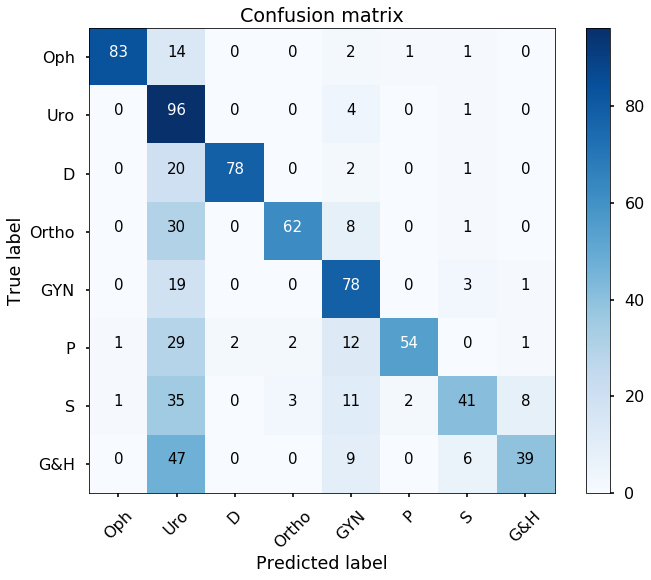

In [8]:
from sklearn.neighbors import KNeighborsClassifier  

  
knnclf = KNeighborsClassifier(n_neighbors=25)
knnclf.fit(x_train,y_train)
preds = knnclf.predict(x_test);

from sklearn import metrics
print("accuracy:"+ str(accuracy_score(y_test, preds)))
print(metrics.confusion_matrix(y_test, preds))

from sklearn.metrics import classification_report
print(classification_report(y_pred=preds, y_true=y_test, digits=4))

cm = metrics.confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, n_classes,
                      title='Confusion matrix')

SVM

accuracy:0.900990099009901
[[100   0   0   0   1   0   0   0]
 [  0  98   0   0   1   0   1   1]
 [  0   0 101   0   0   0   0   0]
 [  0   3   0  97   0   0   1   0]
 [  0   2   0   0  97   0   2   0]
 [  0   0   0   0   5  96   0   0]
 [  0  10   0   4   5   1  76   5]
 [  0  23   1   1   7   0   6  63]]
              precision    recall  f1-score   support

           1     1.0000    0.9901    0.9950       101
           2     0.7206    0.9703    0.8270       101
           3     0.9902    1.0000    0.9951       101
           4     0.9510    0.9604    0.9557       101
           5     0.8362    0.9604    0.8940       101
           6     0.9897    0.9505    0.9697       101
           7     0.8837    0.7525    0.8128       101
           8     0.9130    0.6238    0.7412       101

   micro avg     0.9010    0.9010    0.9010       808
   macro avg     0.9106    0.9010    0.8988       808
weighted avg     0.9106    0.9010    0.8988       808



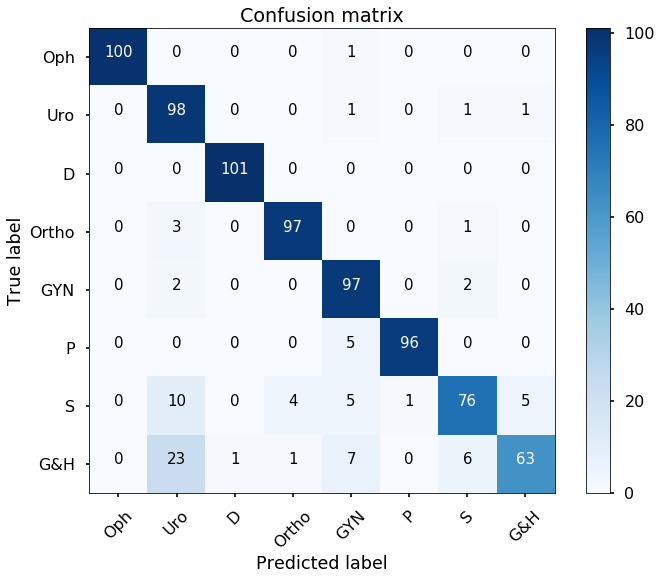

In [10]:
from sklearn.svm import SVC   
svclf = SVC(kernel = 'linear') 
svclf.fit(x_train,y_train)  
preds = svclf.predict(x_test);  

from sklearn import metrics
print("accuracy:"+ str(accuracy_score(y_test, preds)))
print(metrics.confusion_matrix(y_test, preds))

from sklearn.metrics import classification_report
print(classification_report(y_pred=preds, y_true=y_test, digits=4))

cm = metrics.confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, n_classes,
                      title='Confusion matrix')